# Time Series Data Analysis
### Objective
The goal is to perform an in-depth analysis of historic time series data of the power grid system of Great Britain over a span of multiple years, from 2016 to 2023. By leveraging tools like pandas, matplotlib, and seaborn, it aims to uncover trends, patterns, and insights across different time periods.

Source of data: https://www.neso.energy/industry-information/balancing-services/frequency-response-services/historic-frequency-data

### Purpose
1. Statistical Exploration
   - Compute key metrics like mean, standard deviation, skewness, and custom metrics (e.g., CPS1) to understand data behavior.
   - Identify patterns and anomalies over time.
2. Visualization:
   - Create time-series plots, histograms, kernel density plots, and boxplots to visually represent data trends and distributions.
3. Anomaly and Outlier Detection:
    - Detect and quantify deviations from expected values using threshold probabilities and outlier analysis based on the interquartile range (IQR).
5. Granular and Aggregated Analysis:
    - Analyze data for specific months (detailed analysis).
    - Compare data across multiple years and months (aggregated analysis).
7. User Interactivity:
   - Allow users to input a specific year and month for tailored analysis, making the notebook flexible and reusable for different datasets.

### Who would benefit from this notebook?
- Data Analysts: Seeking to understand trends and anomalies in frequency-based time-series data.
- Researchers: Investigating seasonal or yearly variations in frequency data for scientific studies.
- Decision Makers: Looking to interpret metrics like CPS1 for operational insights or system performance.
- Engineers/Scientists: Analyzing time-sensitive processes where frequency trends are critical for optimization or anomaly detection.

### Applications
1. System Monitoring:
   - Analyze how a monitored system's frequency behaves under normal or abnormal conditions.
3. Seasonal Trend Analysis:
   - Identify how frequency data changes over months and years, useful for industries like energy, telecommunications, or climate monitoring.
5. Anomaly and Performance Analysis:
   - Detect periods of unusual activity or performance deviations using custom metrics (CPS1) and statistical thresholds.
7. Granular Insights:
   - Leverage 10-minute resampling to uncover trends that daily or monthly summaries might miss.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Data Loading
Dynamically select and load CSV files based on user input for year and month.
Data for individual months or years is loaded into dataframes for further processing.

In [2]:
year = input("Enter year ( 16 - 23)")
month = input("Enter month for 2019 (1-12)")

Enter year ( 16 - 23) 16
Enter month for 2019 (1-12) 6


In [3]:
if int(year) > 21:
    pa_th = f"Time series data/fnew-20{year}-{month}.csv"
elif int(year) < 20:
    pa_th = f"Time series data/f 20{year} {month}.csv"
else:
    pa_th = f"Time series data/fNew 20{year} {month}.csv"
pa_th

'Time series data/f 2016 6.csv'

In [4]:
df = pd.read_csv(pa_th)
df

,dtm,f
0,2016-06-01 01:00:00 +0100,50.019
1,2016-06-01 01:00:01 +0100,50.018
2,2016-06-01 01:00:02 +0100,50.016
3,2016-06-01 01:00:03 +0100,50.004
4,2016-06-01 01:00:04 +0100,49.995
...,...,...
2591995,2016-07-01 00:59:55 +0100,50.074
2591996,2016-07-01 00:59:56 +0100,50.073
2591997,2016-07-01 00:59:57 +0100,50.071
2591998,2016-07-01 00:59:58 +0100,50.065


## Analysis
Compute the statistical measures such as mean, standard deviation and skewness

In [5]:
mean_value = df['f'].mean()
std_dev = df['f'].std()
skew_ness = df['f'].skew()
print(mean_value)
print(std_dev)
print(skew_ness)

49.999848150077135
0.05436332709591835
0.17052949283325863


## Data Visualization
Generate various plots to visualize trends and distributions, including:
1. Time-Series Plots: Show how frequency changes over days or months.
2. Histograms and KDE Plots: Reveal the frequency distribution and probabilities of threshold crossings.
3. Boxplots: Identify outliers and summarize data spread.
4. Trend Analysis: Compare statistical metrics (mean, standard deviation, skewness) across months and years. 

Text(0, 0.5, 'Frequency')

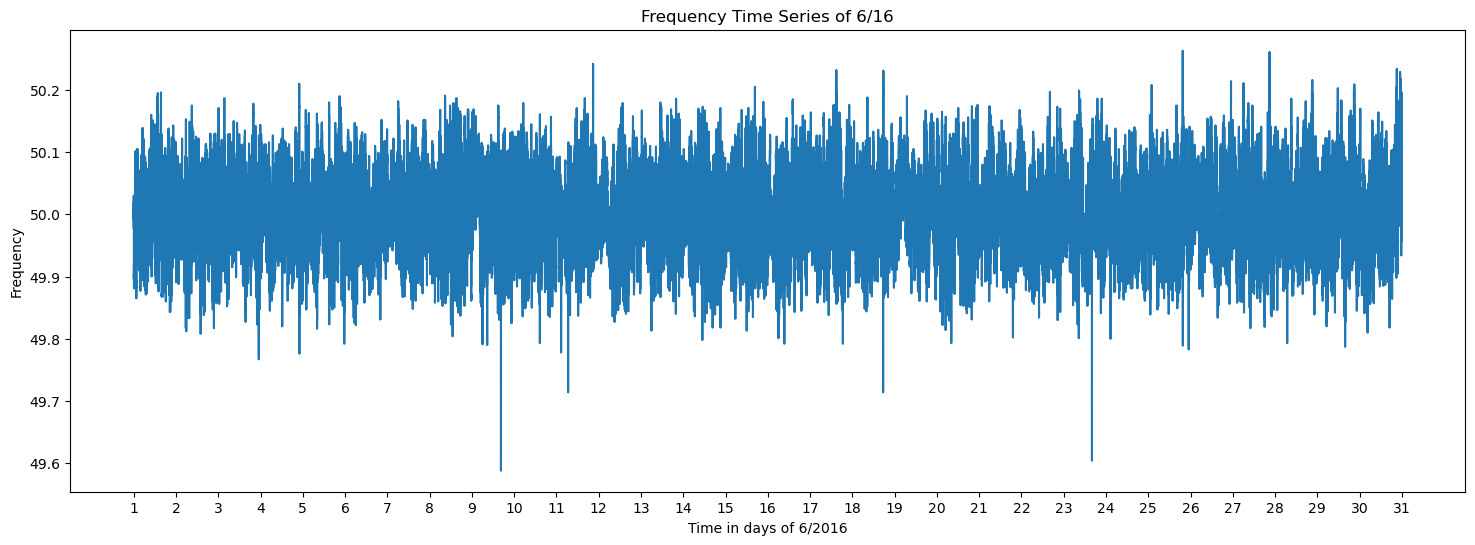

In [6]:
plt.figure(figsize=(18, 6))
plt.plot(df['f'])
plt.xticks(ticks=[i*86400 for i in range(31)], labels=[str(i) for i in range(1, 32)])
plt.title(f'Frequency Time Series of {month}/{year}')
plt.xlabel(f'Time in days of {month}/20{year}')
plt.ylabel('Frequency')

Drawing a frequency distribution graph, also evaluating the probabilities of frequency values falling below or above 49.1 and 50.1 to search for outliers.

In [7]:
prob_49_9 = (df['f'] < 49.9).mean()
prob_50_1 = (df['f'] > 50.1).mean()

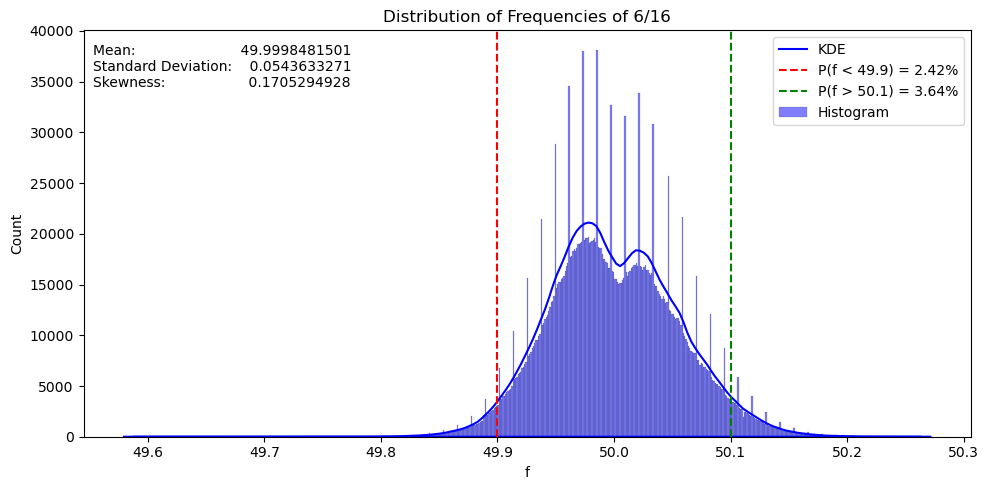

In [8]:
plt.figure(figsize=(10, 5))
sns.histplot(df['f'], kde=True, label='Histogram', color='blue')
sns.kdeplot(df['f'], color='blue', label='KDE')

plt.axvline(x=49.9, color='red', linestyle='--', label=f'P(f < 49.9) = {prob_49_9:.2%}')
plt.axvline(x=50.1, color='green', linestyle='--', label=f'P(f > 50.1) = {prob_50_1:.2%}')

plt.fill_between(df['f'], 0, 1, where=(df['f'] < 49.9), color='red', alpha=0.2)
plt.fill_between(df['f'], 0, 1, where=(df['f'] > 50.1), color='green', alpha=0.2)

plt.text(x=0.01, y=0.94, s=f'Mean:                        {mean_value:.10f}', transform=plt.gca().transAxes, fontsize=10)
plt.text(x=0.01, y=0.90, s=f'Standard Deviation:    {std_dev:.10f}', transform=plt.gca().transAxes, fontsize=10)
plt.text(x=0.01, y=0.86, s=f'Skewness:                   {skew_ness:.10f}', transform=plt.gca().transAxes, fontsize=10)

plt.title(f'Distribution of Frequencies of {month}/{year}')
plt.legend()
plt.tight_layout()
plt.show()

Drawing a boxplot for better visualization and outlier detection.  
Use of the interquartile range (IQR) method to detect outliers.

In [9]:
Q1 = np.percentile(df['f'], 25)
Q3 = np.percentile(df['f'], 75)
IQR = Q3 - Q1
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR
up_outliers = df[df['f'] > upper_whisker]
low_outliers = df[df['f'] < lower_whisker]
prob_up = len(up_outliers)/len(df)
prob_low = len(low_outliers)/len(df)

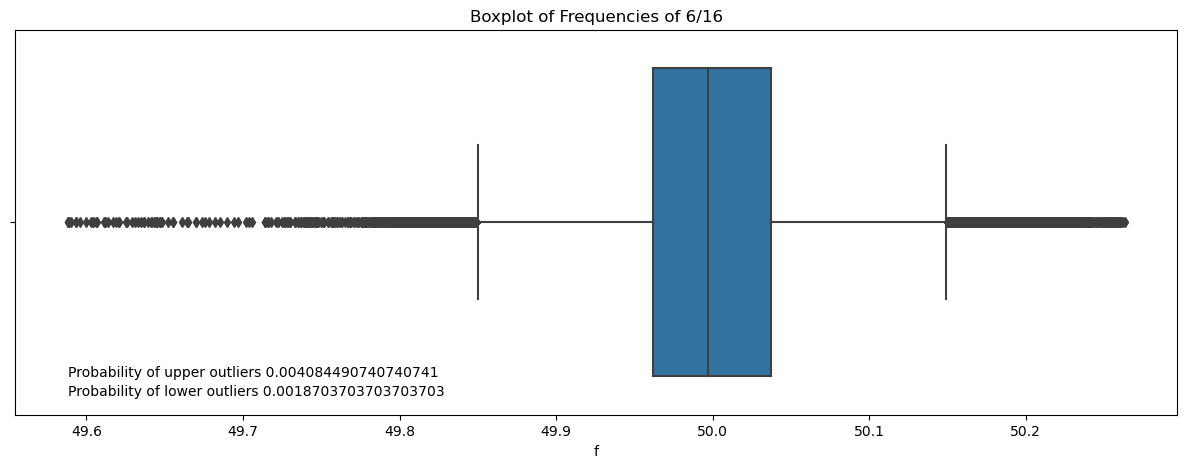

In [10]:
plt.title(f'Boxplot of Frequencies of {month}/{year}')
plt.text(df['f'].min(),0.4, f'Probability of upper outliers {prob_up}', fontsize=10)
plt.text(df['f'].min(),0.45, f'Probability of lower outliers {prob_low}', fontsize=10)
plt.show()

## Resampling and Aggregation
The data is resampled into 10-minute intervals for finer-grained analysis.
Similar calculations and visualizations are applied to the resampled data.

df['dtm'] = pd.to_datetime(df['dtm'], utc=True)
df_10min = df.resample('10T', on='dtm').mean()

Text(0, 0.5, 'Average frequency of 10 minute intervals')

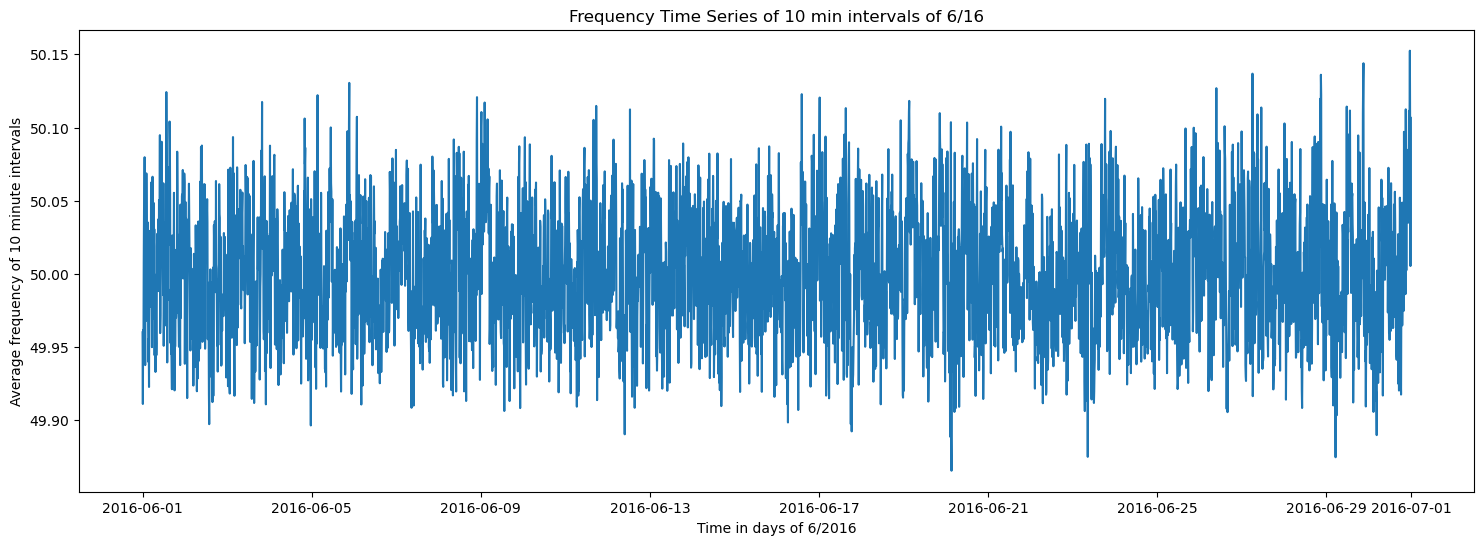

In [12]:
plt.figure(figsize=(18, 6))
plt.plot(df_10min)
plt.title(f'Frequency Time Series of 10 min intervals of {month}/{year}')
plt.xlabel(f'Time in days of {month}/20{year}')
plt.ylabel('Average frequency of 10 minute intervals')

In [13]:
prob_49_9_10min = (df_10min < 49.9).mean()
prob_50_1_10min = (df_10min > 50.1).mean()

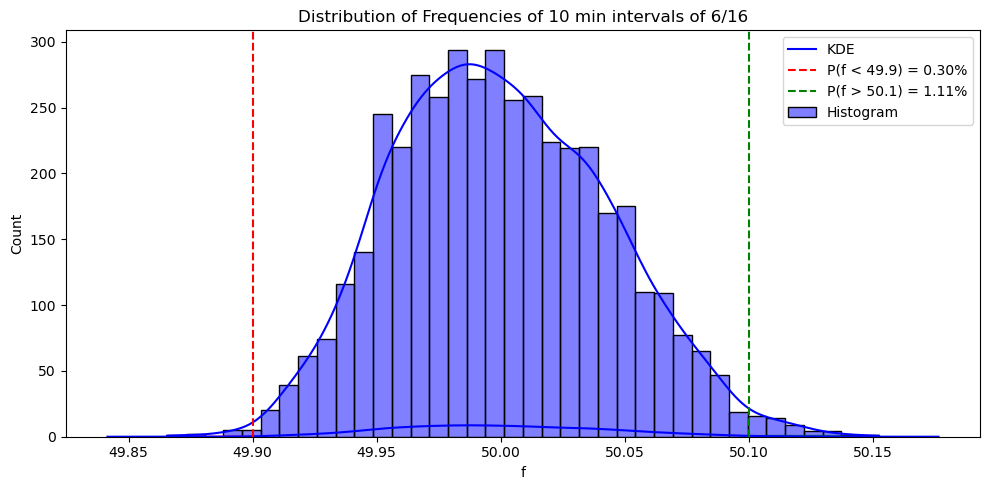

In [14]:
plt.figure(figsize=(10, 5))
prob_49_9_10min = prob_49_9_10min.iloc[0] if isinstance(prob_49_9_10min, pd.Series) else prob_49_9_10min
prob_50_1_10min = prob_50_1_10min.iloc[0] if isinstance(prob_50_1_10min, pd.Series) else prob_50_1_10min

sns.histplot(df_10min['f'], kde=True, label='Histogram', color='blue')
sns.kdeplot(df_10min['f'], color='blue', label='KDE')

plt.axvline(x=49.9, color='red', linestyle='--', label=f'P(f < 49.9) = {prob_49_9_10min:.2%}')
plt.axvline(x=50.1, color='green', linestyle='--', label=f'P(f > 50.1) = {prob_50_1_10min:.2%}')

plt.fill_between(df_10min['f'], 0, 1, where=(df_10min['f'] < 49.9), color='red', alpha=0.2)
plt.fill_between(df_10min['f'], 0, 1, where=(df_10min['f'] > 50.1), color='green', alpha=0.2)

plt.title(f'Distribution of Frequencies of 10 min intervals of {month}/{year}')
plt.legend()
plt.tight_layout()
plt.show()

In [15]:
Q1 = np.percentile(df_10min['f'], 25)
Q3 = np.percentile(df_10min['f'], 75)
IQR = Q3 - Q1
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

up_outliers = df_10min[df_10min['f'] > upper_whisker]
low_outliers = df_10min[df_10min['f'] < lower_whisker]

prob_up = len(up_outliers) / len(df_10min)
prob_low = len(low_outliers) / len(df_10min)

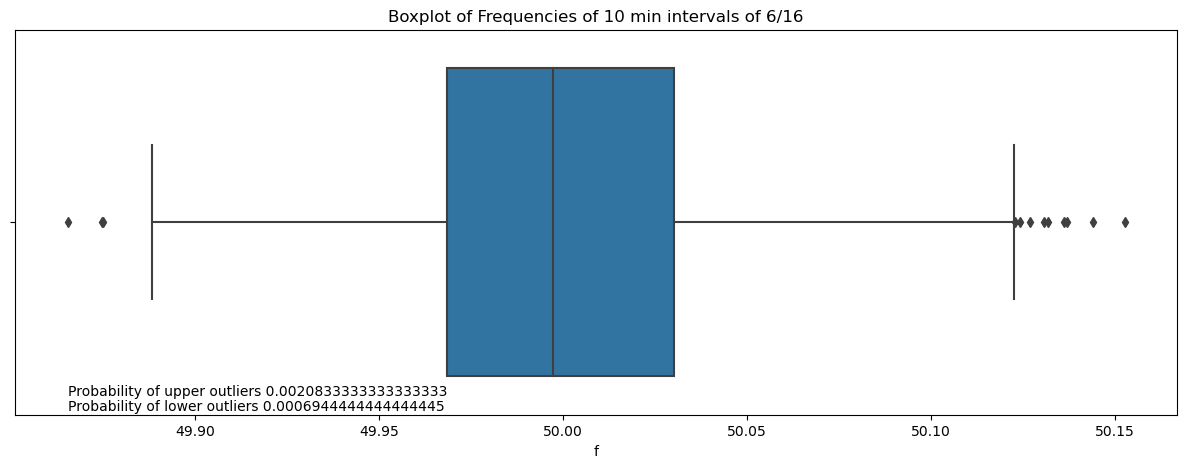

In [16]:
plt.figure(figsize=(15, 5))
sns.boxplot(x=df_10min['f'])
plt.title(f'Boxplot of Frequencies of 10 min intervals of {month}/{year}')
plt.text(df_10min['f'].min(),0.45, f'Probability of upper outliers {prob_up}', fontsize=10)
plt.text(df_10min['f'].min(),0.49, f'Probability of lower outliers {prob_low}', fontsize=10)
plt.show()

The resampled data reduces outliers greatly and gives the entire distribution a smoother shape.

## Custom Metric (CPS1) Calculation

A custom metric, Control Performance Score(CPS1) is calculated based on the deviation of frequencies from 50, normalized by a fixed parameter (e1).  
It is calculated as:

CPS_ratio = Average<sub>10 minute</sub> [(Δf × Δf)] / ε₁²  
CPS₁ = (2 - CPS_ratio) × 100%  
Δf = f - 50  
ε₁ = 0.12

The CPS1 metric is visualized, and its statistical properties like mean, standard deviation and skewness are analyzed.


In [17]:
df_10min['del_f'] = df_10min['f'] - 50

In [18]:
df1_10min = df_10min
e1 = 0.12
cps_ratio = df1_10min['del_f'] * df1_10min['del_f'] / (e1 ** 2)
cps1 = (2 - cps_ratio)*100
cps1 = cps1.to_frame(name='cps')

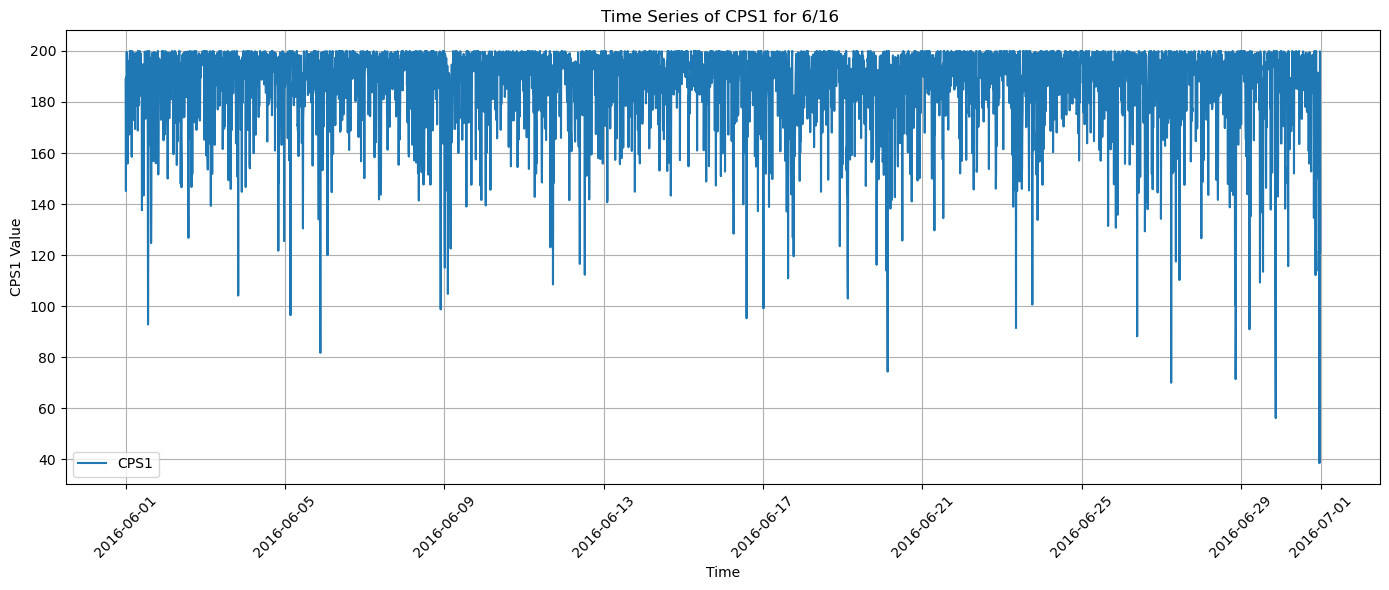

In [19]:
plt.figure(figsize=(14, 6))
plt.plot(cps1.index, cps1, label='CPS1')
plt.title(f'Time Series of CPS1 for {month}/{year} ')
plt.xlabel('Time')
plt.ylabel('CPS1 Value')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
skew_cps1 = cps1['cps'].skew()
mean_cps1 = cps1['cps'].mean()
std_cps1 = cps1['cps'].std()

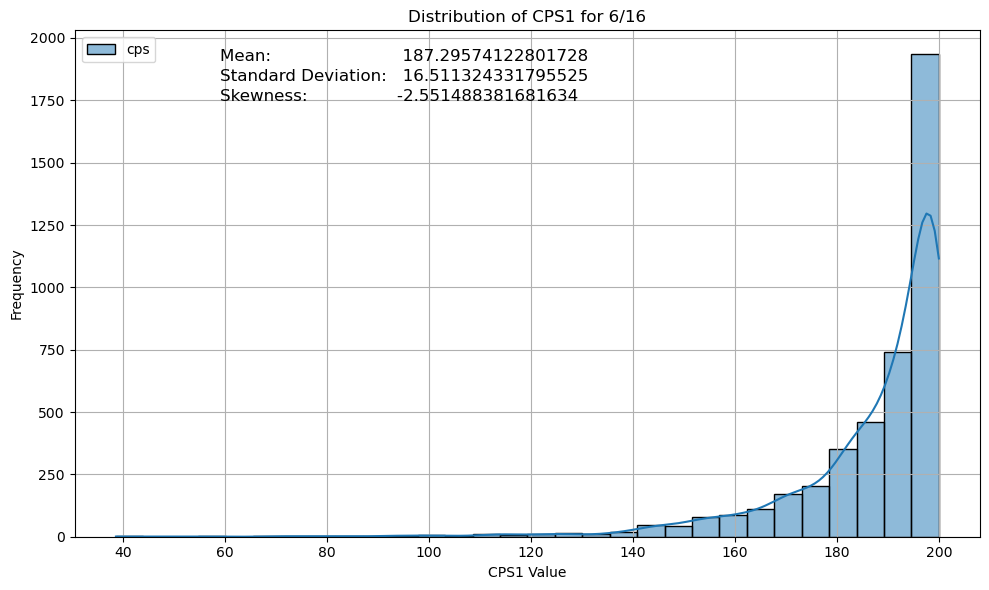

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(cps1, kde=True, bins=30, color='blue')
plt.title(f'Distribution of CPS1 for {month}/{year}')
plt.xlabel('CPS1 Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.text(x=0.16, y=0.94, s=f'Mean:                         {mean_cps1}', transform=plt.gca().transAxes, fontsize=12)
plt.text(x=0.16, y=0.90, s=f'Standard Deviation:   {std_cps1}', transform=plt.gca().transAxes, fontsize=12)
plt.text(x=0.16, y=0.86, s=f'Skewness:                 {skew_cps1}', transform=plt.gca().transAxes, fontsize=12)
plt.tight_layout()
plt.show()

In [22]:
Q1 = np.percentile(cps1['cps'], 25)
Q3 = np.percentile(cps1['cps'], 75)
IQR = Q3 - Q1
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

up_outliers = cps1[cps1['cps'] > upper_whisker]
low_outliers = cps1[cps1['cps'] < lower_whisker]

prob_up = len(up_outliers) / len(cps1)
prob_low = len(low_outliers) / len(cps1)

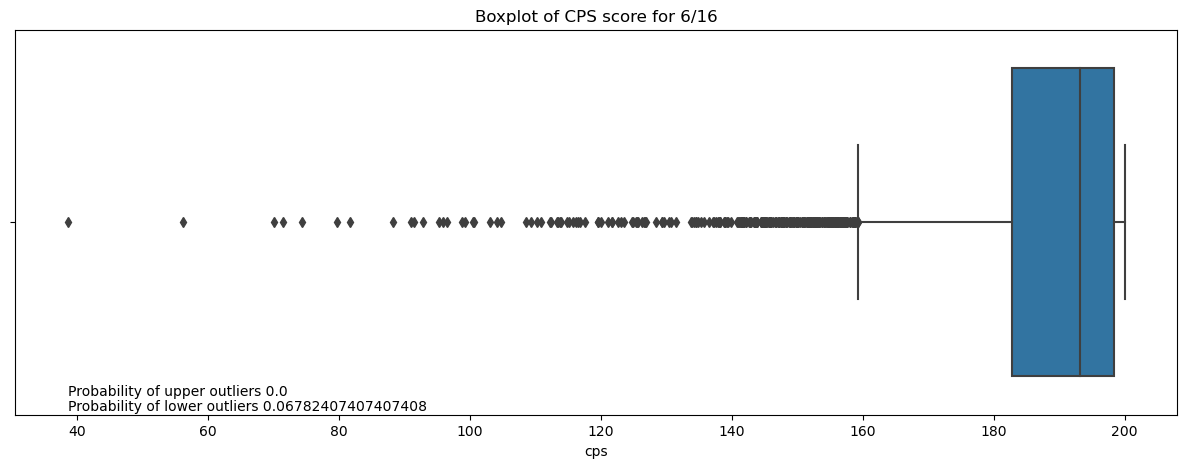

In [23]:
plt.figure(figsize=(15, 5))
sns.boxplot(x=cps1['cps'])
plt.title(f'Boxplot of CPS score for {month}/{year}')
plt.text(cps1['cps'].min(),0.45, f'Probability of upper outliers {prob_up}', fontsize=10)
plt.text(cps1['cps'].min(),0.49, f'Probability of lower outliers {prob_low}', fontsize=10)
plt.show()


---

## Month-to-Month Analysis
In this section, we explore how values change from one month to the next, allowing us to detect seasonality and short-term patterns.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import numpy as np

### Monthly data Aggregation
- We prompt the user to specify a year (16–23) and a month (e.g., 1–12 for January to December).
- Construct a file path dynamically to load the corresponding CSV file containing the time-series data for all the months of given year.
- The selected data is then read into a pandas dataframe (df), which becomes the basis for further analysis.

In [2]:
file_path23 = []
file_path22 = []
file_path21 = []
file_path20 = []
file_path19 = []
file_path18 = []
file_path17 = []
file_path16 = []
for j in range(12):
    file_path23.append(f"Time series data/fnew-2023-{j+1}.csv")
    file_path22.append(f"Time series data/fnew-2022-{j+1}.csv")
    file_path21.append(f"Time series data/fNew 2021 {j+1}.csv")
    file_path20.append(f"Time series data/fNew 2020 {j+1}.csv")
    file_path19.append(f"Time series data/f 2019 {j+1}.csv")
    file_path18.append(f"Time series data/f 2018 {j+1}.csv")
    file_path17.append(f"Time series data/f 2017 {j+1}.csv")
    file_path16.append(f"Time series data/f 2016 {j+1}.csv")

In [3]:
df23 = [pd.read_csv(file) for file in file_path23]

In [4]:
df22 = [pd.read_csv(file) for file in file_path22]

In [5]:
df21 = [pd.read_csv(file) for file in file_path21]

In [6]:
df20 = [pd.read_csv(file) for file in file_path20]

In [7]:
df19 = [pd.read_csv(file) for file in file_path19]

In [8]:
df18 = [pd.read_csv(file) for file in file_path18]

In [9]:
df17 = [pd.read_csv(file) for file in file_path17]

In [10]:
df16 = [pd.read_csv(file) for file in file_path16]

In [11]:
df = [df16,df17,df18,df19,df20,df21,df22,df23]

In [12]:
var = int(input("For which year would you like a month to month analysis?(16 - 23)"))
if var > 23 or var < 16:
    print('Wrong input')
    var = input("For which year would you like a month to month analysis?")

For which year would you like a month to month analysis?(16 - 23) 16


In [13]:
dff = df[var - 16]

In [14]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 
          'July', 'August', 'September', 'October', 'November', 'December']

### Metrics Calculation
- Mean: The average value of the frequency variable (f) for all the months in the selected year.
- Standard Deviation: The variability of the frequency data around the mean.
- Skewness: The asymmetry of the frequency distribution.

In [15]:
mean = []
for i in range(12):
    alt = dff[i]
    mean.append(alt['f'].mean())
print(f'The MEAN of the months in year 20{var} from January to December is:')
mean

The MEAN of the months in year 2016 from January to December is:


[50.00012469310031,
 49.999959434466774,
 49.99935163157108,
 49.999878437499994,
 49.99960146430705,
 49.999848150077135,
 49.99970576948923,
 49.99977019601255,
 49.999632899691385,
 50.000258082437284,
 49.99958763850309,
 49.99938094459378]

In [16]:
stdev = []
for i in range(12):
    alt = dff[i]
    stdev.append(alt['f'].std())
print(f'The STANDARD DEVIATION of the months in year 20{var} from January to December is:')
stdev

The STANDARD DEVIATION of the months in year 2016 from January to December is:


[0.05586816636132356,
 0.054133148818792186,
 0.05603461541688417,
 0.059400231446219684,
 0.057202088112117494,
 0.05436332709591835,
 0.055509918485342924,
 0.05278128727576658,
 0.053231414418722006,
 0.054953242802027596,
 0.056555685087250646,
 0.05530752830269297]

In [17]:
skew = []
for i in range(12):
    alt = dff[i]
    skew.append(alt['f'].skew())
print(f'The SKEWNESS of the months in year 20{var} from January to December is:')
skew

The SKEWNESS of the months in year 2016 from January to December is:


[0.18420039462330567,
 0.17955178514424272,
 0.1625644514814289,
 0.21712817804041615,
 0.192713122831179,
 0.17052949283325863,
 0.18007534293460922,
 0.24807129628458455,
 0.30352814369722364,
 0.18847609995596137,
 0.1507974699611169,
 0.13213733662728175]

## Visualization
Clear month to month changes of mean, standard deviation and skewness for the given year to visualize changes within the year.

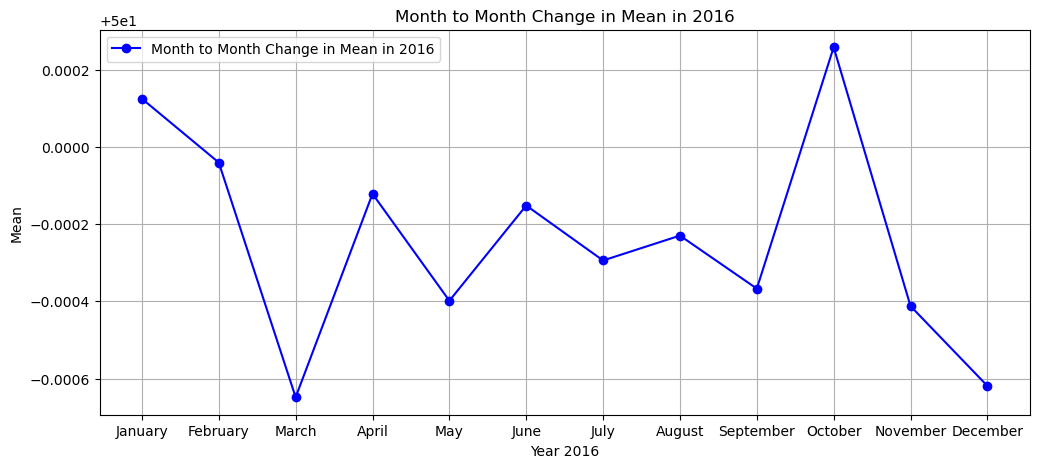

In [18]:
plt.figure(figsize=(12, 5))
plt.plot(months[0:], mean[0:], marker='o', color='b', linestyle='-', label=f'Month to Month Change in Mean in 20{var}')
plt.xlabel(f'Year 20{var}')
plt.ylabel('Mean')
plt.title(f'Month to Month Change in Mean in 20{var}')
plt.grid(True)
plt.legend()
plt.show()

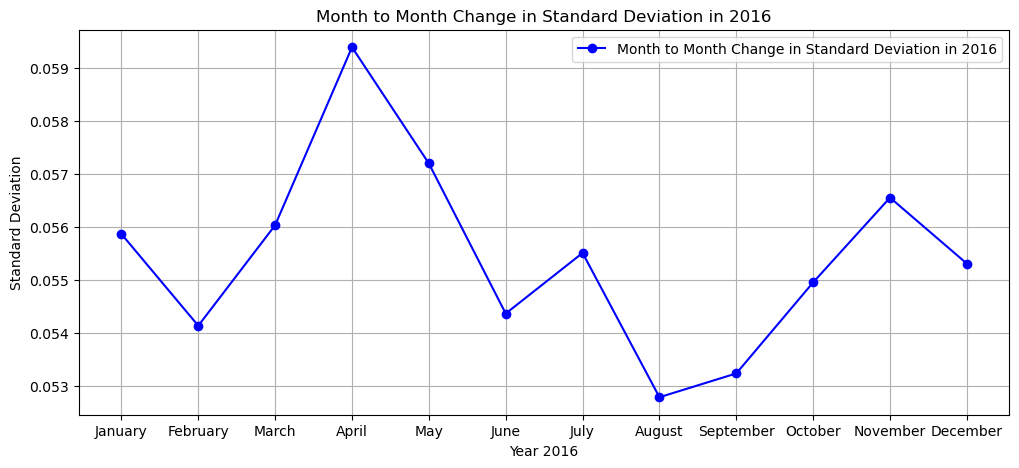

In [19]:
plt.figure(figsize=(12, 5))
plt.plot(months[0:], stdev[0:], marker='o', color='b', linestyle='-', label=f'Month to Month Change in Standard Deviation in 20{var}')
plt.xlabel(f'Year 20{var}')
plt.ylabel('Standard Deviation')
plt.title(f'Month to Month Change in Standard Deviation in 20{var}')
plt.grid(True)
plt.legend()
plt.show()

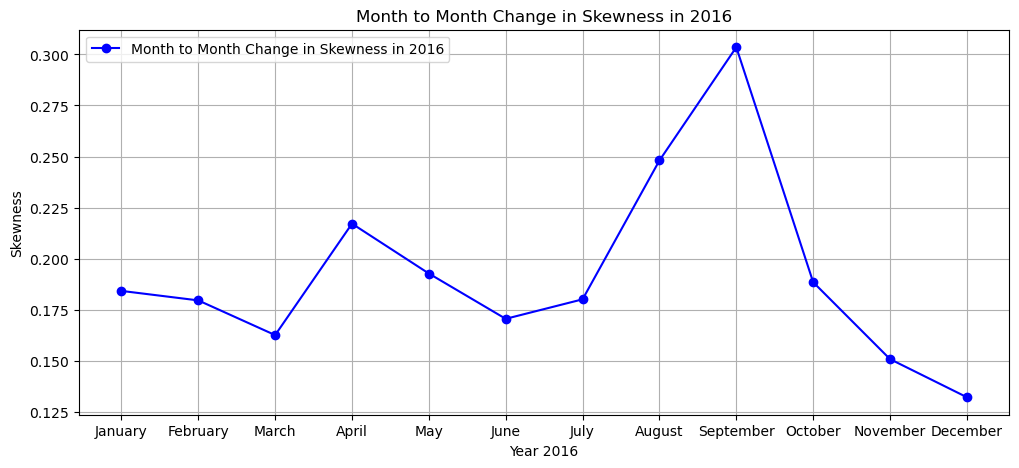

In [20]:
plt.figure(figsize=(12, 5))
plt.plot(months[0:], skew[0:], marker='o', color='b', linestyle='-', label=f'Month to Month Change in Skewness in 20{var}')
plt.xlabel(f'Year 20{var}')
plt.ylabel('Skewness')
plt.title(f'Month to Month Change in Skewness in 20{var}')
plt.grid(True)
plt.legend()
plt.show()

### Crosstables
Crosstables for metrics such as mean, standard deviation, skewness and CPS1 score for all the months and years are created.  
They provide an overview of how specific metrics change over months within a year and allow easy year-to-year comparisons.

In [43]:
mean_v = []
std_dev = []
sk_ew =[]
for j in range(8):
    for i in range(12):
        alt = df[j][i]
        mean_v.append(alt['f'].mean())
        std_dev.append(alt['f'].std())
        sk_ew.append(alt['f'].skew())

In [47]:
df_10min = []
for j in range(8):
    for i in range(12): 
        df[j][i]['dtm'] = pd.to_datetime(df[j][i]['dtm'], utc=True)
        df_10min.append(df[j][i].resample('10T', on='dtm').mean())

In [67]:
for i in range(len(df_10min)):
    df_10min[i]['del_f'] = df_10min[i]['f'] - 50

In [94]:
cps1 = []
df1_10min = df_10min
e1 = 0.12
for i in range(len(df1_10min)):
    cps_ratio = df1_10min[i]['del_f'] * df1_10min[i]['del_f'] / (e1 ** 2)
    cps = (2 - cps_ratio)*100
    cps1.append(cps.to_frame(name='cps'))

In [120]:
mean_cps1 = []
meancps1 = 0
i = 0
for i in range(len(df1_10min)):
    mean_cps1.append(cps1[i]['cps'].mean())

In [22]:
start_date = datetime(2016, 1, 1)
end_date = datetime(2023, 12, 1)
date_list = []
while start_date <= end_date:
    date_str = start_date.strftime('%B %Y')
    date_list.append(date_str)
    start_date += timedelta(days=31)
    start_date = start_date.replace(day=1)

In [23]:
years = list(range(2016, 2024))  
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [98]:
data = {
    'Year': np.repeat(years, len(months)),
    'Month': months * len(years),
    'Mean': mean_v,
    'Standard Deviation': std_dev,
    'Skewness': sk_ew,
    'CPS1 score': mean_cps1
}

In [100]:
dff = pd.DataFrame(data)

In [102]:
mean_crosstable = dff.pivot(index='Month', columns='Year', values='Mean')
std_crosstable = dff.pivot(index='Month', columns='Year', values='Standard Deviation')
skew_crosstable = dff.pivot(index='Month', columns='Year', values='Skewness')
cps1_crosstable = dff.pivot(index='Month', columns='Year', values='CPS1 score')
mean_crosstable_str = mean_crosstable.to_string()
std_crosstable_str = std_crosstable.to_string()
skew_crosstable_str = skew_crosstable.to_string()
cps1_crosstable_str = cps1_crosstable.to_string()

In [27]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [28]:
print("Mean Crosstable:")
print(mean_crosstable_str)

Mean Crosstable:
Year        2016       2017       2018       2019       2020       2021       2022       2023
Month                                                                                        
Apr    49.999878  49.999878  50.000670  49.999552  49.999934  49.999942  49.999384  49.998264
Aug    49.999770  49.999702  49.999890  49.999747  49.999964  49.999397  49.999926  49.999293
Dec    49.999381  49.999787  50.000083  49.999399  49.999871  49.999326  49.999655  49.999715
Feb    49.999959  49.999686  49.999038  49.999948  50.000108  49.999661  49.998789  49.999102
Jan    50.000125  49.999793  49.998279  49.999461  49.999706  49.998951  49.999627  50.000033
Jul    49.999706  49.999840  49.999390  49.999510  49.999065  49.999820  49.999321  49.999172
Jun    49.999848  49.999730  50.000576  49.999347  49.999108  49.999600  49.999305  50.000266
Mar    49.999352  49.999693  49.998407  49.999166  49.998770  49.999476  50.000166  50.000479
May    49.999601  49.999438  49.998767  49.

In [29]:
print("Standard Deviation Crosstable:")
print(std_crosstable_str)

Standard Deviation Crosstable:
Year       2016      2017      2018      2019      2020      2021      2022      2023
Month                                                                                
Apr    0.059400  0.059400  0.065470  0.063192  0.063690  0.061405  0.065917  0.067242
Aug    0.052781  0.059625  0.066557  0.061021  0.065087  0.056961  0.063289  0.071131
Dec    0.055308  0.060521  0.065476  0.065653  0.065637  0.065718  0.068682  0.073112
Feb    0.054133  0.062952  0.066638  0.067533  0.067354  0.065294  0.067501  0.066791
Jan    0.055868  0.057272  0.063057  0.067083  0.066901  0.065318  0.066502  0.067044
Jul    0.055510  0.058447  0.066160  0.063134  0.064728  0.056940  0.066154  0.070592
Jun    0.054363  0.058637  0.065116  0.065724  0.067197  0.056820  0.066083  0.066632
Mar    0.056035  0.061541  0.066643  0.064804  0.065229  0.064475  0.066229  0.068380
May    0.057202  0.057244  0.061135  0.062157  0.066222  0.061759  0.065877  0.068288
Nov    0.056556  0.0622

In [30]:
print("\nSkewness Crosstable:")
print(skew_crosstable_str)


Skewness Crosstable:
Year       2016      2017      2018      2019      2020      2021      2022      2023
Month                                                                                
Apr    0.217128  0.217128  0.173684  0.021993  0.073176  0.016012 -0.011887  0.007425
Aug    0.248071  0.160088  0.080777 -0.167067  0.079276  0.049366 -0.079571 -0.008519
Dec    0.132137  0.143827  0.027453  0.040868  0.082740 -0.025699 -0.125877 -0.060243
Feb    0.179552  0.175251  0.210999  0.109476  0.088170  0.072333  0.036685 -0.051901
Jan    0.184200  0.141618  0.192784  0.055709  0.075563  0.045363 -0.038123 -0.077443
Jul    0.180075  0.167760  0.132483 -0.007209  0.035755  0.026994 -0.031983  0.051441
Jun    0.170529  0.242673  0.225864  0.024631 -0.039932  0.053358 -0.047610 -0.059344
Mar    0.162564  0.155698  0.258905  0.094293  0.027947  0.032388 -0.042444 -0.002858
May    0.192713  0.162299  0.274153  0.002589  0.036094  0.040346  0.010057 -0.022331
Nov    0.150797  0.084224  0.065

In [104]:
print("\nCPS1 score Crosstable:")
print(cps1_crosstable_str)


CPS1 score Crosstable:
Year         2016        2017        2018        2019        2020        2021        2022        2023
Month                                                                                                
Apr    183.996177  183.996177  181.385382  182.218842  179.070954  182.041797  181.375562  180.399911
Aug    186.952225  183.442019  181.345325  182.890788  181.708559  184.584225  181.723667  176.075023
Dec    185.348513  182.996043  180.037427  178.655198  178.736696  179.369068  177.473820  173.743788
Feb    185.683594  181.742086  180.694045  179.649062  177.713481  178.744541  178.832131  179.071724
Jan    184.723755  184.840957  182.318680  180.754368  178.167212  178.964729  179.642321  178.731897
Jul    186.200994  184.388248  182.062582  182.430439  181.194760  184.167548  180.475082  175.766169
Jun    187.295741  183.947224  181.632972  180.971938  180.530021  184.493614  181.405764  179.373259
Mar    185.523142  182.429363  179.868940  180.980422  178

### Purpose of month-to-month analysis

1. Comparative Analysis:
    - Allow quick comparisons between months within the same year.
    - Enable cross-year comparisons for the same month (e.g., January 2016 vs. January 2023).


2. Trend Identification:

   Help identify long-term trends, such as:
    - Increasing variability (standard deviation) over years.
    - Changes in distribution symmetry (skewness) over time.
    - Seasonal or cyclical patterns in frequency (e.g., high means in summer months).


3. Summarized Insights:
    - Provide a clear, high-level summary of key metrics without requiring extensive manual exploration of raw data.
   


---

## Yearly Data Aggegration
- Data for each year (2016–2023) is stored as separate dataframes (df_2016, df_2017, etc.).
- Monthly data within each year is concatenated to create a complete yearly dataset.
- All yearly datasets are appended to a list yearsData for easier iteration and analysis.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
file_path23 = []
file_path22 = []
file_path21 = []
file_path20 = []
file_path19 = []
file_path18 = []
file_path17 = []
file_path16 = []
for j in range(12):
    file_path23.append(f"Time series data/fnew-2023-{j+1}.csv")
    file_path22.append(f"Time series data/fnew-2022-{j+1}.csv")
    file_path21.append(f"Time series data/fNew 2021 {j+1}.csv")
    file_path20.append(f"Time series data/fNew 2020 {j+1}.csv")
    file_path19.append(f"Time series data/f 2019 {j+1}.csv")
    file_path18.append(f"Time series data/f 2018 {j+1}.csv")
    file_path17.append(f"Time series data/f 2017 {j+1}.csv")
    file_path16.append(f"Time series data/f 2016 {j+1}.csv")

In [7]:
df23 = [pd.read_csv(file) for file in file_path23]
df_2023 = pd.concat(df23).reset_index(drop=True)

In [9]:
df22 = [pd.read_csv(file) for file in file_path22]
df_2022 = pd.concat(df22).reset_index(drop=True)

In [10]:
df21 = [pd.read_csv(file) for file in file_path21]
df_2021 = pd.concat(df21).reset_index(drop=True)

In [11]:
df20 = [pd.read_csv(file) for file in file_path20]
df_2020 = pd.concat(df20).reset_index(drop=True)

In [14]:
df19 = [pd.read_csv(file) for file in file_path19]
df_2019 = pd.concat(df19).reset_index(drop=True)

In [15]:
df18 = [pd.read_csv(file) for file in file_path18]
df_2018 = pd.concat(df18).reset_index(drop=True)

In [18]:
df17 = [pd.read_csv(file) for file in file_path17]
df_2017 = pd.concat(df17).reset_index(drop=True)

In [19]:
df16 = [pd.read_csv(file) for file in file_path16]
df_2016 = pd.concat(df16).reset_index(drop=True)

In [23]:
yearsData =[]
yearsData.append(df_2016)
yearsData.append(df_2017)
yearsData.append(df_2018)
yearsData.append(df_2019)
yearsData.append(df_2020)
yearsData.append(df_2021)
yearsData.append(df_2022)
yearsData.append(df_2023)

### Computation of Metrics:
For each year, the following statistics are calculated:
- Mean
- Standard Deviation
- Skewness

The yearly mean, standard deviation, and skewness are displayed in ascending order for quick inspection.

In [25]:
mean = []
for i in range(8):
    var = yearsData[i]
    mean.append(var['f'].mean())
print('The MEAN of the yearly data from 2016 to 2023 in ascending order is:')
mean

The MEAN of the yearly data from 2016 to 2023 in ascending order is:


[49.99975741420648,
 49.999767267345355,
 49.99954026373018,
 49.99951522523475,
 49.99953736133252,
 49.999495081811176,
 49.99957675126834,
 49.99956397967398]

In [27]:
stdev = []
for i in range(8):
    var1 = yearsData[i]
    stdev.append(var1['f'].std())
print('The STANDARD DEVIATION of the yearly data from 2016 to 2023 in ascending order is:')
stdev

The STANDARD DEVIATION of the yearly data from 2016 to 2023 in ascending order is:


[0.05547457093110161,
 0.060313145784300616,
 0.06619979694933396,
 0.06413676008403366,
 0.06598002460527315,
 0.062045348380162145,
 0.06631743631902193,
 0.06997593350081385]

In [29]:
skew = []
for i in range(8):
    var2 = yearsData[i]
    skew.append(var2['f'].skew())
print('The SKEWNESS of the yearly data from 2016 to 2023 in ascending order is:')
skew

The SKEWNESS of the yearly data from 2016 to 2023 in ascending order is:


[0.1912503209107049,
 0.17418984273777707,
 0.14306793985320065,
 0.030642071887173578,
 0.05038155168385676,
 0.033768456501354335,
 -0.04686138489464443,
 -0.023525703337346666]

In [31]:
years = ['2016','2017','2018','2019','2020','2021','2022','2023']

### Visualization of Yearly Trends
Three separate line plots are created to illustrate:
- Changes in mean over the years.
- Trends in standard deviation across years.
- Variations in skewness across the dataset for each year.

These plots help visualize how the frequency variable (f) evolves from 2016 to 2023.

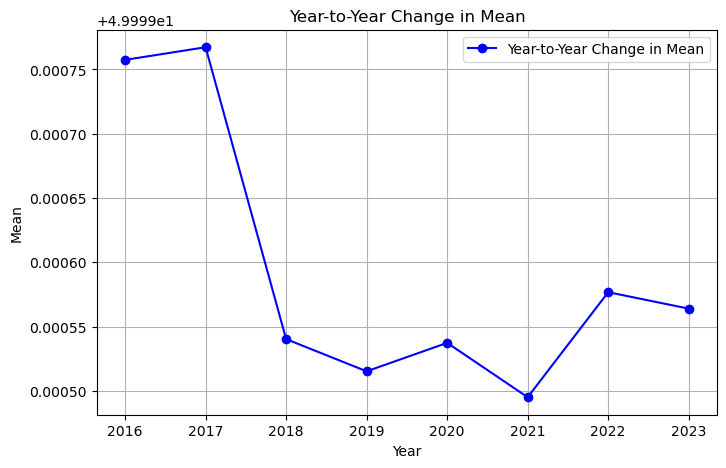

In [33]:
plt.figure(figsize=(8, 5))
plt.plot(years[0:], mean[0:], marker='o', color='b', linestyle='-', label='Year-to-Year Change in Mean')
plt.xlabel('Year')
plt.ylabel('Mean')
plt.title('Year-to-Year Change in Mean')
plt.grid(True)
plt.legend()
plt.show()

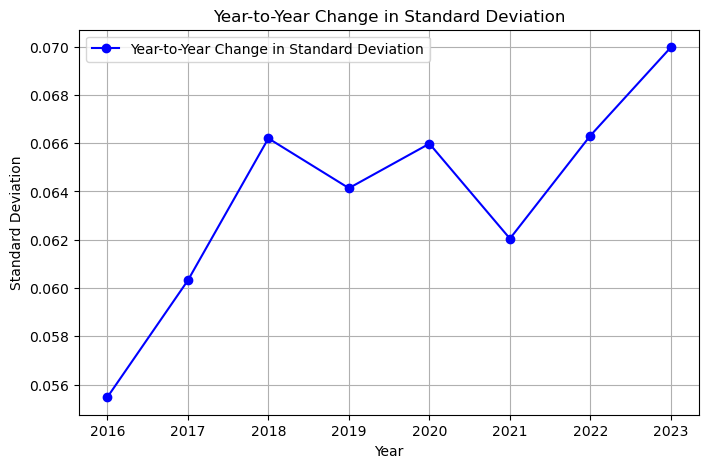

In [35]:
plt.figure(figsize=(8, 5))
plt.plot(years[0:], stdev[0:], marker='o', color='b', linestyle='-', label='Year-to-Year Change in Standard Deviation')
plt.xlabel('Year')
plt.ylabel('Standard Deviation')
plt.title('Year-to-Year Change in Standard Deviation')
plt.grid(True)
plt.legend()
plt.show()

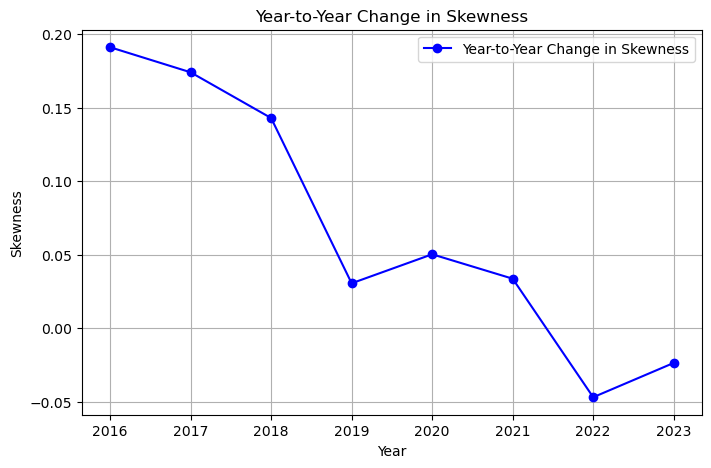

In [37]:
plt.figure(figsize=(8, 5))
plt.plot(years[0:], skew[0:], marker='o', color='b', linestyle='-', label='Year-to-Year Change in Skewness')
plt.xlabel('Year')
plt.ylabel('Skewness')
plt.title('Year-to-Year Change in Skewness')
plt.grid(True)
plt.legend()
plt.show()

## Conclusion
We have built a powerful tool for exploring, analyzing, and visualizing frequency data. By combining user interactivity, detailed analysis, and aggregated insights, it provides a flexible and reusable framework for understanding time-series data across multiple timeframes.